## First Network simulation

> This module creates a first network of biological neurons and simulates their activity. We will then try percolation on this network to understand the effect on neurosegenrative diseases.

In [5]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import multiprocessing

import nngt
import nest
import nngt.simulation as ns
from pathlib import Path

from modules import simulation as nsim
from modules import percolation as per
from modules import analysis

from importlib import reload
#reload(nsim)
#reload(per)
#reload(analysis)

In [6]:
#import sys
#print(sys.path)

In [8]:
num_omp = multiprocessing.cpu_count() #Number of cores on the system

# network Parameters
w = 500.
ds = 0.01
do = 2.
deg = 10.
N = 1
l = 50.
R = 1000

from fromMallory.Neurons_Parameters import di_RS

params = di_RS
params['nb_neurons'] = N
print(params)

{'b': 70.0, 't_ref': 2.0, 'V_m': -51.0, 'tau_w': 300.0, 'w': 37.0, 'E_L': -70.0, 'I_e': 262.0, 'g_L': 12.01, 'nb_neurons': 1, 'a': 2.0, 'Delta_T': 1.8, 'C_m': 200.0, 'V_reset': -48.0, 'V_th': -50.0, 'tau_syn_ex': 0.2, 'V_peak': 30.0}


In [33]:
neur = nngt.NeuralGroup(nodes = 1,neuron_model="aeif_psc_alpha",neuron_param = params)
pop = nngt.NeuralPop.from_groups([neur], ["neurons"])#syn_spec={'model': 'tsodyks2_synapse'})
net = nngt.generation.all_to_all(nodes=1,population = pop)


In [34]:
'''
Prepare the network and devices.
'''
nest.ResetKernel()
# send to NEST,
gids = net.to_nest()
# excite
nngt.simulation.set_minis(net, base_rate= 100., weight = 0.5 , gids = gids)
# record
groups = [key for key in net.population]
recorder_spike, record_spike = nngt.simulation.monitor_groups(groups, net)
recorder_vm, record_vm       = nngt.simulation.monitor_groups(groups,net,nest_recorder="multimeter",params={"withtime":True, "record_from":["V_m"] })

'''
Simulate and plot.
'''
simtime = 15000.
nest.Simulate(simtime)

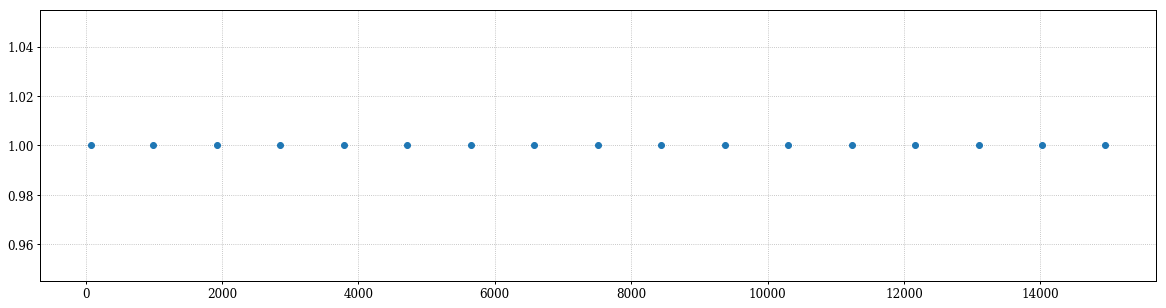

In [41]:
dmm0 = nest.GetStatus(recorder_spike[0])[0]
Vms1 = dmm0["events"]["senders"]
ts1  = dmm0["events"]["times"]

plt.figure(figsize=(20,5))
plt.plot(ts1,Vms1,'o')

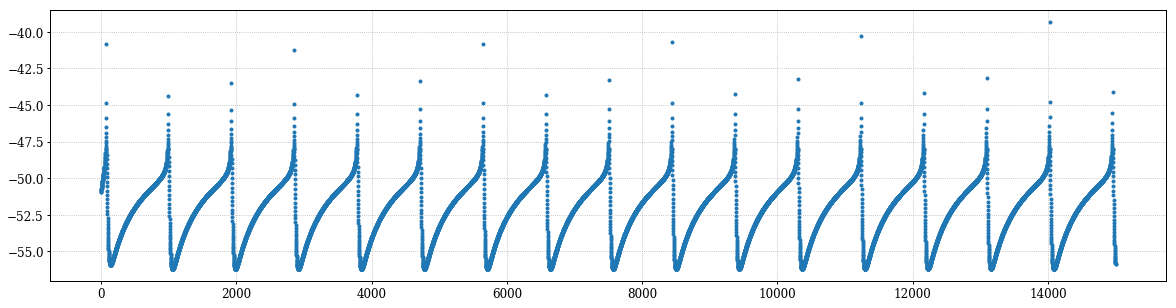

In [42]:
plt.figure(figsize=(20,5))
dmm2 = nest.GetStatus(recorder_vm[0])[0]
Vms2 = dmm2["events"]["V_m"]
ts2 = dmm2["events"]["times"]
plt.plot(ts2,Vms2,'.')